### 1.2 Practical 
#### 1.2.2 Non-parametric Regression
In this task we will implement and evaluate the effect of a GP-prior. Specifically we will look at the squared exponential covariance function,


In [29]:
## import packages
import pylab as pb
import numpy as np
from math import pi
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

Question 10
- Create a GP-prior with a squared exponential covariance function.
- For each of 4 different length scales, please draw 10 samples from this prior and visualise them. Explain
the observed consequences of altering the length-scale of the covariance function
You will need to first formulate the prior distribution and then the posterior. How to do this can be found in (Bishop 2006, p. 306-308). First we will look at the prior.




**Create a GP-prior with a squared exponential covariance function.**
**For each of 4 different length scales, please draw 10 samples from this prior and visualise them. Explain the observed consequences of altering the length-scale of the covariance function.**

In [30]:
def plotGP(L,sigmaf):
    X = np.linspace(-2.0,2.0,2000) 
    X = X[:,None]
    mu = np.zeros((2000)) # vector of the means
    K =  sigmaf**2 * np.exp(-cdist(X, X, 'sqeuclidean')/(L*L))
    # Generate 10 sample path with mean mu and covariance C
    Z = np.random.multivariate_normal(mu,K,10)
    
    return X,Z


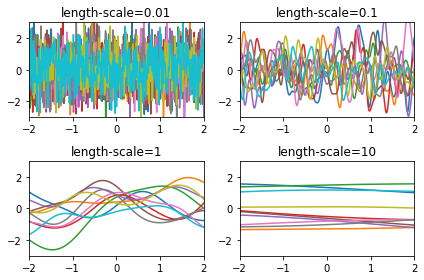

In [31]:
L      = 0.01
sigmaf = 1
X,z1 = plotGP(L,sigmaf)
plt.figure()
plt.subplot(2,2,1)
for i in range(10):
    plt.plot(X[:],z1[i,:])
    title = 'length-scale='+ str(L) 
    plt.title(title)
    plt.xlim((-2,2))
    plt.ylim((-3,3))

L      = 0.1
sigmaf = 1
X,z2 = plotGP(L,sigmaf)
plt.subplot(2,2,2)


for i in range(10):
    plt.plot(X[:],z2[i,:])
    title = 'length-scale='+ str(L) 
    plt.title(title)
    plt.xlim((-2,2))
    plt.ylim((-3,3))

L      = 1
sigmaf = 1

X,z3 = plotGP(L,sigmaf)

plt.subplot(2,2,3)
for i in range(10):
    plt.plot(X[:],z3[i,:])
    title = 'length-scale='+ str(L) 
    plt.title(title)
    plt.xlim((-2,2))
    plt.ylim((-3,3))
    
L      = 10
sigmaf = 1
X,z4 = plotGP(L,sigmaf)
plt.subplot(2,2,4)
for i in range(10):
    plt.plot(X[:],z4[i,:])
    title = 'length-scale='+ str(L)
    plt.title(title)
    plt.xlim((-2,2))
    plt.ylim((-3,3))
plt.tight_layout()    
plt.show()



Question 11

1. What is the posterior before we observe any data?
2. Compute the predictive posterior distribution of the model.
3. Sample from this posterior with points both close to and far away from the observed data. Explain the observed effects.
4. Plot the data, the predictive mean and the predictive variance of the posterior from the data.
5. Compare the samples of the posterior with the ones from the prior. Is the observed behavior desirable?
6. What would happen if you added a diagonal covariance matrix to the squared exponential?


In [32]:
def ComputePosterior(x_pred,x_train,y_train,L,beta,cov):
    ## return Cn = # of train x # of train
    Cn     = Kernel(x_train,x_train,L) + cov * np.eye(np.size(x_train,0))
    ## return K = # of pred x # of train
    K      = Kernel(x_train,x_pred,L) 
    t      = y_train
    C      = np.linalg.inv(Cn)
    mu     = np.dot(np.dot(K.T,C),t)
    ## compute variance
    c      = Kernel(x_pred,x_pred,L) 
    sigma2 = c - np.dot(np.dot(K.T,C),K)
    return mu, sigma2

In [33]:
x = np.array([[-4],[-3],[-2],[-1],[0],[2],[3],[5]])
t = []
cov = 3
for i in x:
    error  = float(np.random.multivariate_normal([0],[[cov]]))
    temp_t = (2 + (0.5*i-1)**2)*np.sin(3*i) + error
    t.append(float(temp_t))

t = np.array(t)
t = t.reshape(8,1)

In [34]:
def Kernel(x_pred,x_train,L):
    ## k(x_m,x_n)
    sigmaf = 1
    #print(x_pred.shape)
    K =  sigmaf**2 * np.exp(-cdist(x_pred, x_train, 'sqeuclidean')/(L*L)) 
    ## K has dimension m x m
    return K

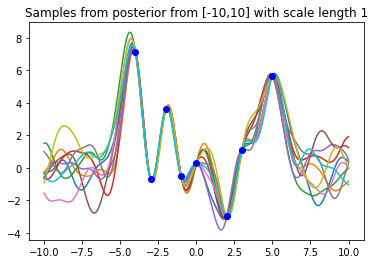

In [35]:
## plot the sampling
num_sample = 2000
num_line   = 10
x_pred = np.array(np.linspace(-10,10,num_sample))
x_pred = x_pred.reshape(num_sample,1)
L = 1
beta = 1/3
mu,sigma2 = ComputePosterior(x_pred,x,t,L,beta,0)
mu = mu.reshape(num_sample,)



Z = np.random.multivariate_normal(mu,sigma2,num_line)
plt.figure()
for i in range(num_line):
    plt.plot(x_pred,Z[i,:])

plt.plot(x, t, 'bo')
plt.title('Samples from posterior from [-10,10] with scale length 1')
plt.show()


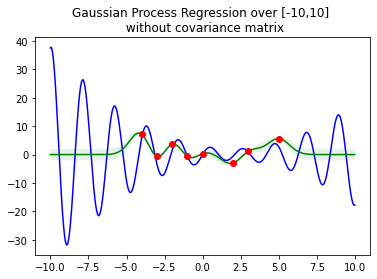

In [36]:
### plot the mean and variance
y_pred = []
for i in x_pred:
    temp_y = (2 + (0.5*i-1)**2)*np.sin(3*i)
    y_pred.append(temp_y)

plt.figure()
plt.plot(x_pred,y_pred,color = 'blue')
plt.plot(x_pred,mu,color = 'green')
plt.plot(x,t,'ro')

upper = mu + 2*np.sqrt(sigma2.diagonal())
lower = mu - 2*np.sqrt(sigma2.diagonal())

plt.title('Gaussian Process Regression over [-10,10] \n without covariance matrix')
plt.fill_between(np.reshape(x_pred,(num_sample,)), upper, lower, facecolor='green', interpolate=True, alpha=0.1)
plt.show()

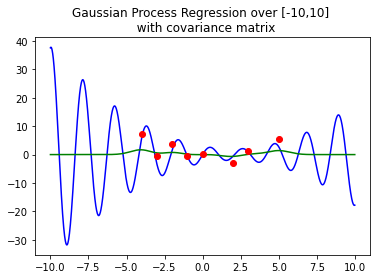

In [37]:
## add covariance matrix
cov = 3
mu2,sigma2 = ComputePosterior(x_pred,x,t,L,beta,cov)
mu2 = mu2.reshape(num_sample,)
plt.figure()
plt.plot(x_pred,y_pred,color = 'blue')
plt.plot(x_pred,mu2,color = 'green')
plt.plot(x,t,'ro')

upper = mu2 + 2*np.sqrt(sigma2.diagonal())
lower = mu2 - 2*np.sqrt(sigma2.diagonal())

plt.title('Gaussian Process Regression over [-10,10] \n  with covariance matrix')
plt.show()

In [38]:
def Kernel_covmatrix(x_pred,x_train,L,cov):
    ## k(x_m,x_n)
    sigmaf = 1
     
    K =  sigmaf**2 * np.exp(-cdist(x_pred, x_train, 'sqeuclidean')/(L*L)) #+ cov * np.eye(len(x_pred))
    ## K has dimension m x m
    return K